# Regressão Linear

## 1. Carregando dados
<hr>

In [ ]:
# importando bibliotecas
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Vamos carregar um _dataset_ do consumo de cerveja em São Paulo, em uma área universitária, onde existem algumas festas com grupos de alunos na média de 18 a 28 anos de idade.

Esse _dataset_ possui as seguintes colunas:
* data - Data
* temp_media - Temperatura Média (°C)
* temp_min - Temperatura Mínima (°C)
* temp_max - Temperatura Máxima (°C)
* chuva - Precipitação (mm)
* fds - Final de Semana (1 = sim; 0 = não)
* consumo - Consumo de Cerveja (litros)

In [ ]:
# Carregar dataset
url = "https://raw.githubusercontent.com/Zurkon/awesome-datasets/master/Beer-Consumption-Sao-Paulo/beer-consumption.csv"

dados = pd.read_csv(url)
dados

,data;temp_media;temp_min;temp_max;chuva;fds;consumo
0,01/01/2015;27.3;23.9;32.5;0;0;25461
1,02/01/2015;27.02;24.5;33.5;0;0;28972
2,03/01/2015;24.82;22.4;29.9;0;1;30814
3,04/01/2015;23.98;21.5;28.6;1.2;1;29799
4,05/01/2015;23.82;21;28.3;0;0;28900
...,...
360,27/12/2015;24;21.1;28.2;13.6;1;32307
361,28/12/2015;22.64;21.1;26.7;0;0;26095
362,29/12/2015;21.68;20.3;24.1;10.3;0;22309
363,30/12/2015;21.38;19.3;22.4;6.3;0;20467


A visualização dos dados está estranho pela forma em que foi separado os dados. A extensão `csv` que dizer "_Comma Separated Value_" (_Valores Separados por Vírgula_). No nosso arquivo os dados estão separados por _ponto e vírgula_ (`;`).

Para corrigir isso passamos em um parâmetro do método `read_csv()` chamado `sep` que o valores estão separados por `;` (_ponto e vírgula_).

In [ ]:
dados = pd.read_csv(url, sep=";")
dados

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900
...,...,...,...,...,...,...,...
360,27/12/2015,24.00,21.1,28.2,13.6,1,32307
361,28/12/2015,22.64,21.1,26.7,0.0,0,26095
362,29/12/2015,21.68,20.3,24.1,10.3,0,22309
363,30/12/2015,21.38,19.3,22.4,6.3,0,20467


In [ ]:
# Verificando o tamanho do dataset
dados.shape

(365, 7)

## 2. Análise Preliminares
<hr>

### Estatísticas Descritivas

In [ ]:
# usamos round(2) para reduzir a quantidade de numeros depois da virgula para apenas 2
dados.describe().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00



### Matriz de correlação



> O **coeficiente de correlação** é uma medida de associação linear entre duas variáveis e situa-se entre `-1` e `+1` sendo que `-1` indica associação negativa perfeita e `+1` indica associação positiva perfeita.

In [ ]:
# Monta a Matriz de correlação
dados.corr().round(4)

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
temp_min,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
temp_max,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
chuva,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
fds,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
consumo,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


Veremos que a correlação entre `consumo` e a `temp_media` é de `0.5746`, já para `temp_min` teremos `0.3925`, já em `temp_max` teremos `0.6427`. Esses valores revelam uma relação linear boa com o consumo, ou seja, as pessoas tendem a consumir mais cerveja.

Observando agora a correlação entre `consumo` e `chuva` temos o valor negativo `-0.1938`. O que podemos interpretar deste dado? Quando chove, a tendência é que o consumo de cerveja diminua, por isso o valor negativo. Já no caso de `fds`, verificamos que o consumo se eleva.

## 3. Comportamento da Variável Dependente (Y)
<hr>

### "_Plotando_" a variável _dependente_ (y)

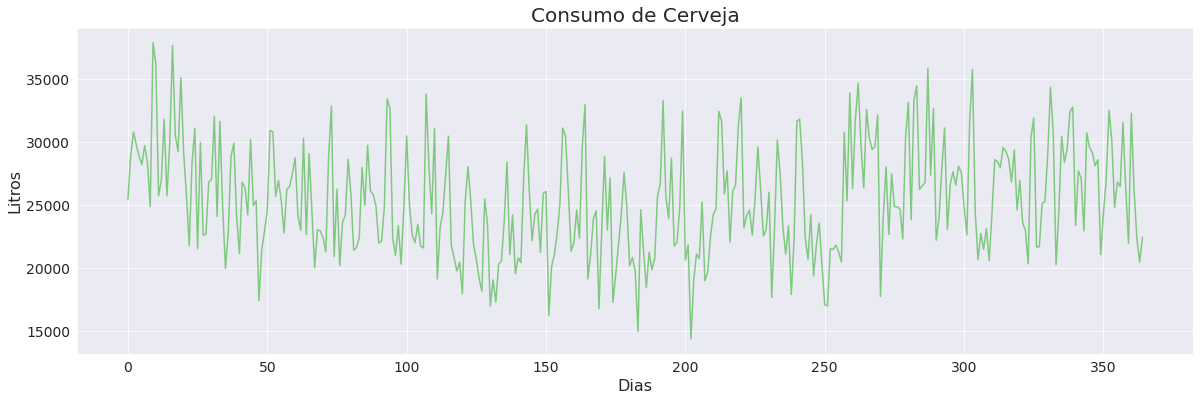

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))

# configurar a tabela para melhor visualização
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Dias', fontsize=16)

# fontsize no 'plot()' define o tamanho da letra dos valores nos cantos do gráfico
ax = dados["consumo"].plot(fontsize=14)

### Box plot da variável _dependente_ (y) com **Seaborn**

In [ ]:
# importe a biblioteca Seaborn
import seaborn as sns

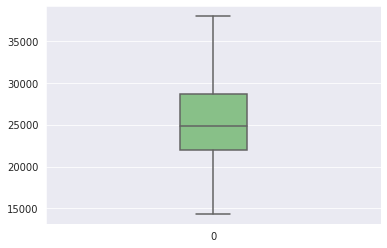

In [ ]:
# plotar os dados com o método boxplot()
sns.boxplot(data=dados["consumo"], orient='v', width=0.2);

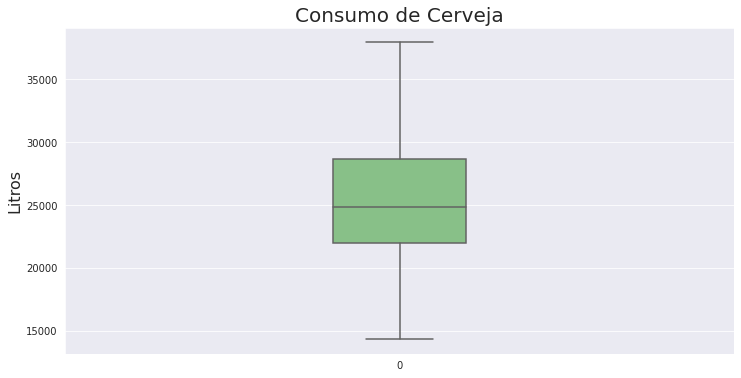

In [ ]:
# plotar com o figure() do pyplot para fazer configurações adicionais
ax = sns.boxplot(data=dados["consumo"], orient='v', width=0.2);

# configurar a tabela para melhor visualização
ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax;

### Box Plot com duas variáveis

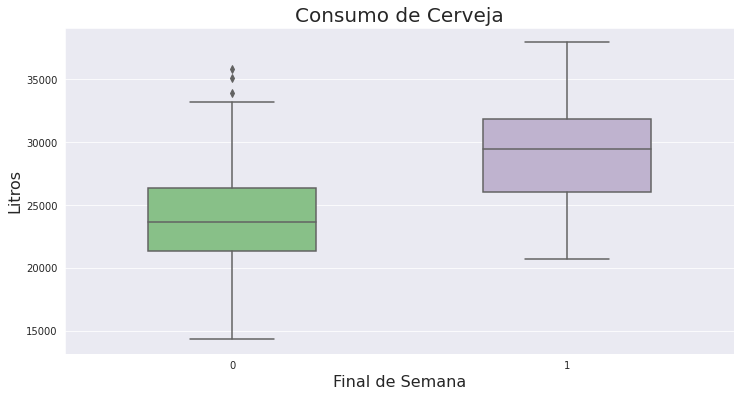

In [ ]:
# Investigando a variável dependente (y) segundo determinada característica
ax = sns.boxplot(y="consumo", x="fds", data=dados, orient='v', width=0.5);

ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Final de Semana', fontsize=16)
ax;

Podemos perceber visivelmente que o consumo de cerveja cai quando não estamos em um fim de semana. Pode ocorrer variáções se estivermos lidando com feriados, que é o que gera esses pontos acima do outliner do _boxplot_ da esquerda.

Caso precise deixar o gráfico mais apresentável ou realizar algumas modificações visuais do _boxplot_ existe algumas configurações que você pode fazer no **Seaborn**.

In [ ]:
# Escolher uma paletta de cores
sns.set_palette("Accent")

# Escolher um estilo -> white, dark, whitegrid, darkgrid, ticks
sns.set_style("darkgrid")

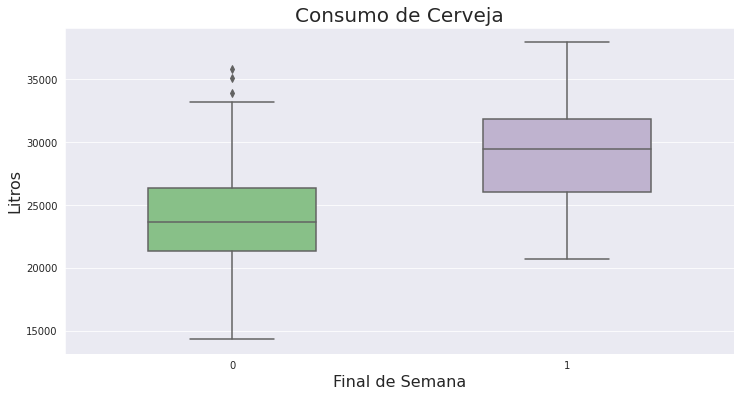

In [ ]:
# Plotar novamente
ax = sns.boxplot(y="consumo", x="fds", data=dados, orient='v', width=0.5);

ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Final de Semana', fontsize=16)
ax;

### Distribuição de Frequência

Distribuição de frequências da variável _dependente_ (y)

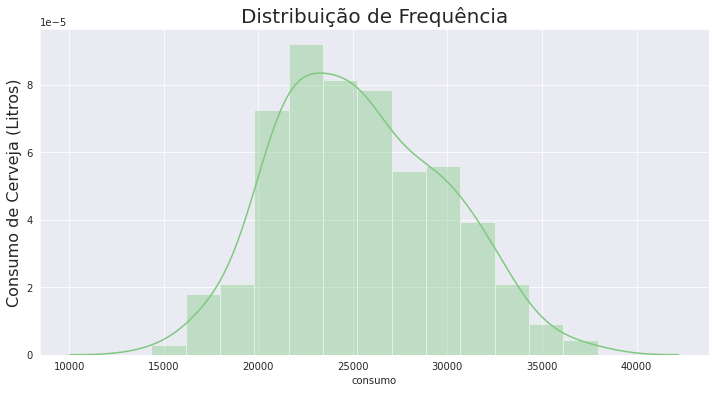

In [ ]:
# Investigando a variável dependente (y) segundo determinada característica
ax = sns.distplot(dados["consumo"]);

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequência', fontsize=20)
ax.set_ylabel('Consumo de Cerveja (Litros)', fontsize=16)
ax;

Repare que as configurações de `estilo` e `paleta de cores` que foram definidas anteriormente usando `sns.set_style()` e `sns.set_palette()` respectivamente ainda estão em vigor.

Caso queira modificar essas configurações será necessário usar esses métodos novamente para definir novos estilos e cores antes de "_plotar_" este último gráfico.

## Variável Dependente vs Variáveis Explicativas
<hr>

### Gráficos de dispersão entre as variáveis do dataset

Usaremos o método [`pairplot()`](https://seaborn.pydata.org/generated/seaborn.pairplot.html) do Seaborn para "_plotar_" o relacionamento entre pares de variáveis em um _dataset_.

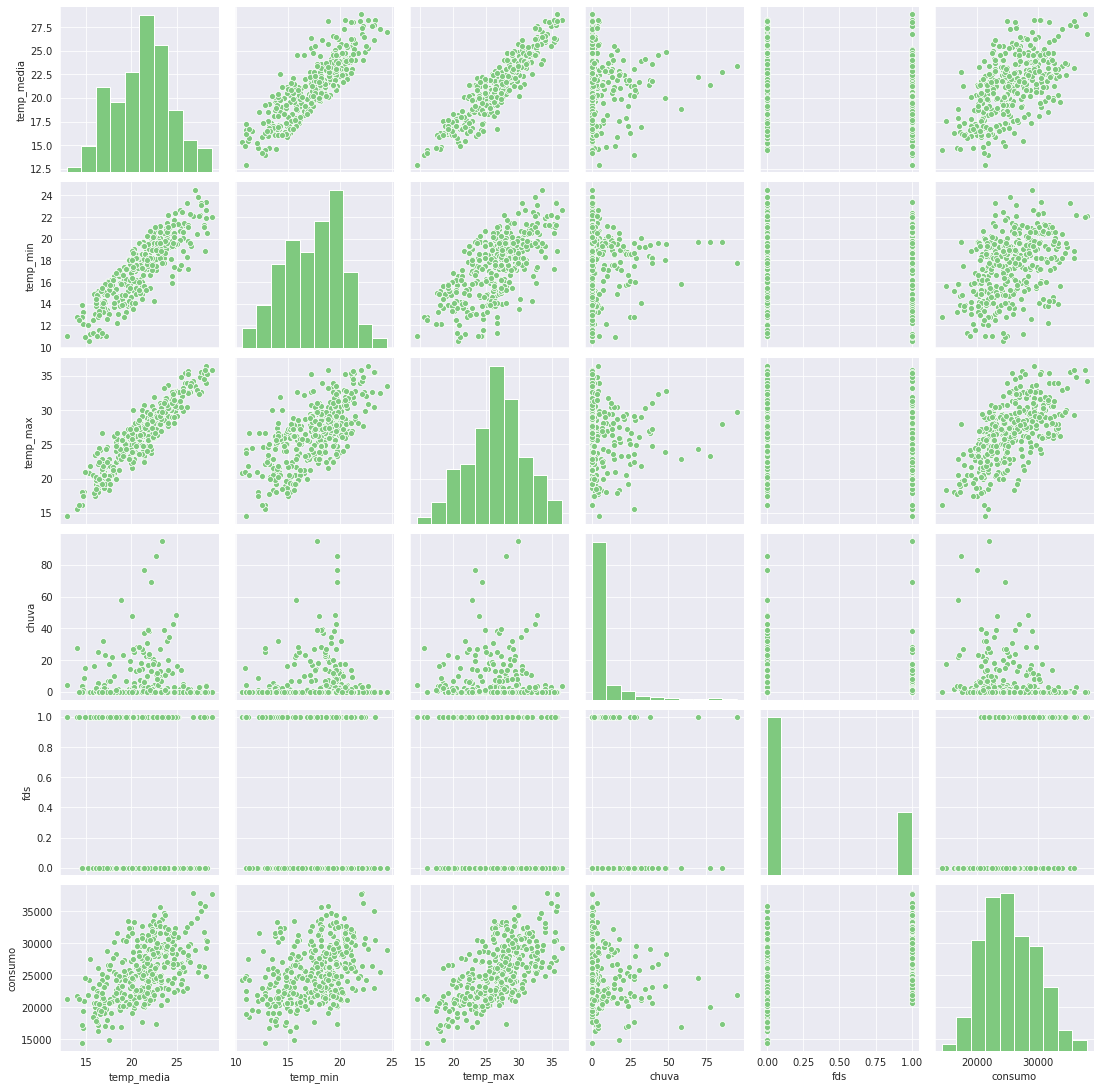

In [ ]:
ax = sns.pairplot(dados);

### Plotando o pairplot fixando somente uma variável no eixo y

O `pairplot()` gera uma série de gráficos que representam dados das variáveis.

Vamos gerar outro gráfico com o `pairplot()` focando apenas na relação de consumo com as outras variáveis.

Para "_plotar_" apenas as linhas que temos interesse, configuramos alguns parâmetros no método `pairplot()`:

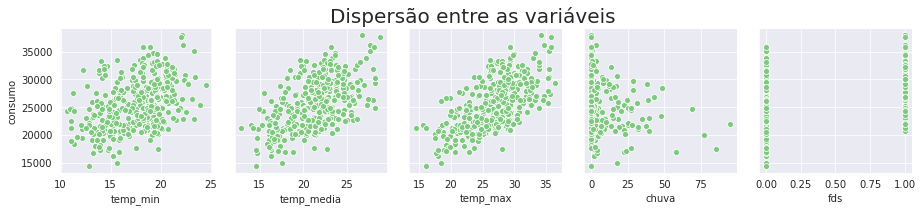

In [ ]:
ax = sns.pairplot(dados, y_vars="consumo", x_vars=["temp_min", "temp_media", "temp_max", "chuva", "fds"])

# Podemos definir um título também.
# O parâmetro 'y=1.1' usamos para posicionar o gráfico mais abaixo para que o título não fique na frente
ax.fig.suptitle("Dispersão entre as variáveis", fontsize=20, y=1.1);

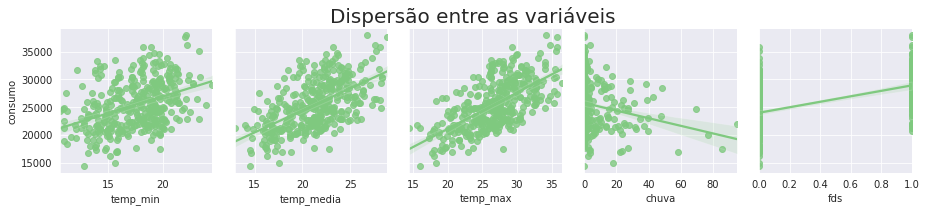

In [ ]:
# Podemos estimar uma reta de digressão entre variáveis com o parâmetro ' kind="reg" '
ax = sns.pairplot(dados, y_vars="consumo", x_vars=["temp_min", "temp_media", "temp_max", "chuva", "fds"], kind="reg")

# Podemos definir um título também.
# O parâmetro 'y=1.1' usamos para posicionar o gráfico mais abaixo para que o título não fique na frente
ax.fig.suptitle("Dispersão entre as variáveis", fontsize=20, y=1.1);

A ideia principal do `pairplot()` é, com o uso de gráficos de dispersão, podermos identificar se duas variáveis apresentam uma relação linear entre elas e também a direção desta relação.

### Plotando relacionamentos entre variáveis com jointplot

Usamos o método [`jointplot()`](https://seaborn.pydata.org/generated/seaborn.jointplot.html) para "_plotar_" o relacionamento entre duas variáveis e suas respectivas distribuições de frequência.

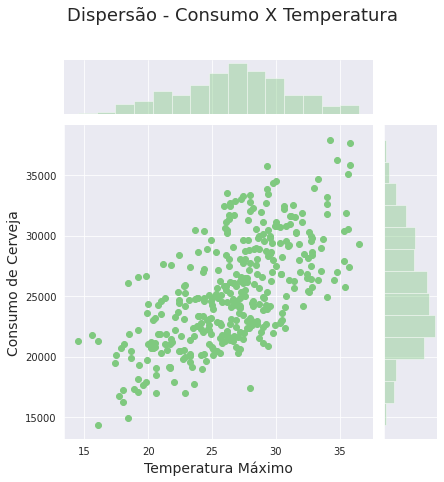

In [ ]:
ax = sns.jointplot(x="temp_max", y="consumo", data=dados)

ax.fig.suptitle("Dispersão - Consumo X Temperatura", fontsize=18, y=1.1)
ax.set_axis_labels("Temperatura Máximo", "Consumo de Cerveja", fontsize=14)
ax;

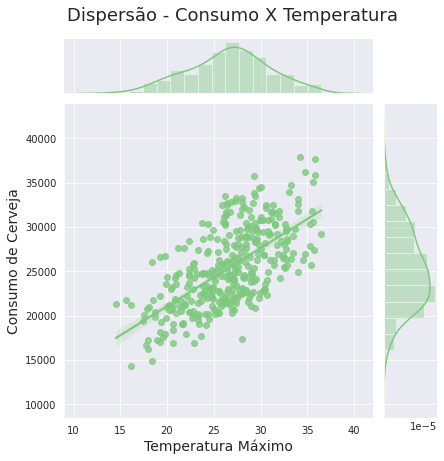

In [ ]:
# Podemos adicionar o parâmetro ' kind="reg" ' para que o Seaborn desenhe as linhas de regressão
ax = sns.jointplot(x="temp_max", y="consumo", data=dados, kind="reg")

ax.fig.suptitle("Dispersão - Consumo X Temperatura", fontsize=18, y=1.05)
ax.set_axis_labels("Temperatura Máximo", "Consumo de Cerveja", fontsize=14)
ax;

### Plotando relacionamentos entre variáveis com lmplot

Usamos o método [`lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html) para "_plotar_" uma reta de regressão entre duas variáveis juntamente com a dispersão entre elas.

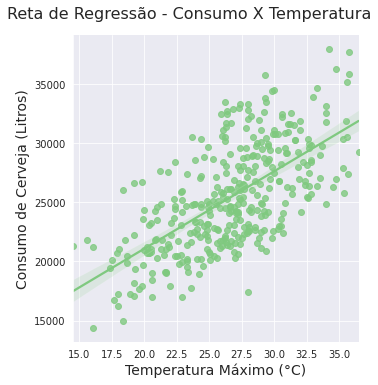

In [ ]:
ax = sns.lmplot(x="temp_max", y="consumo", data=dados)

ax.fig.suptitle("Reta de Regressão - Consumo X Temperatura", fontsize=16, y=1.05)
ax.set_xlabels("Temperatura Máximo (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveja (Litros)", fontsize=14)
ax;

Podemos aproveitar a mesma estrutura de código e incluir parâmetros extras. Plotaremos o gráfico com temperatura máximo, consumo e uma nova terceira variável para entendermos os efeitos dela no resultado.

Podemos fazer isso usando um esquema de cores e ícones diferentes. Chamaremos o parâmetro `hue="fds"`, em seguida, iremos configurar marcadores diferentes para quando for fim de semana ou não. Para tanto, escrevemos `markers=["o", "x"]`. Como já adicionamos uma legenda com o método `add_legend()`, temos que inserir o parâmetro `legend=False`, caso contrário serão criadas duas legendas de maneira desnecessária.

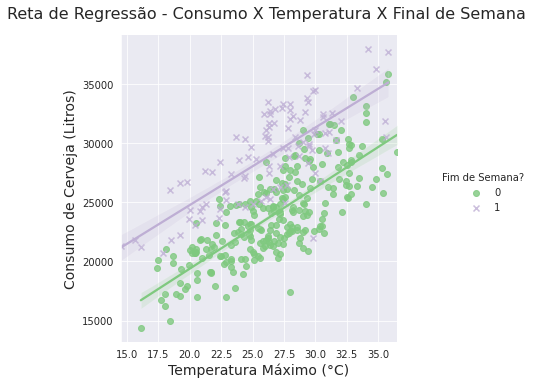

In [ ]:
ax = sns.lmplot(x="temp_max", y="consumo", data=dados, hue="fds", markers=["o", "x"], legend=False)

ax.fig.suptitle("Reta de Regressão - Consumo X Temperatura X Final de Semana", fontsize=16, y=1.05)
ax.set_xlabels("Temperatura Máximo (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveja (Litros)", fontsize=14)
ax.add_legend(title="Fim de Semana?")
ax;

Caso a visualização esteja muito confusa, poderemos substituir `hue="fds"` por `col="fds"` para gerar dois plots diferentes.

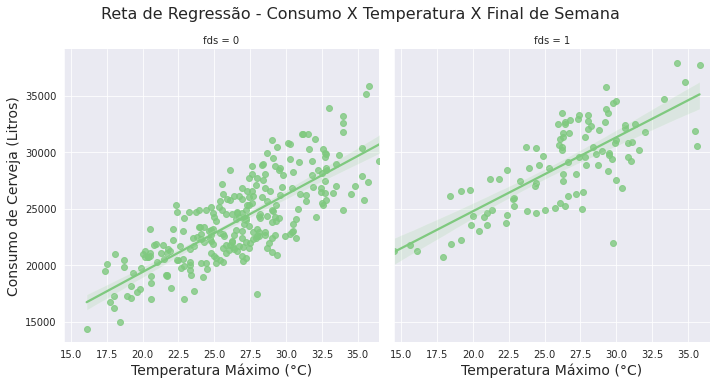

In [ ]:
ax = sns.lmplot(x="temp_max", y="consumo", data=dados, col="fds")

ax.fig.suptitle("Reta de Regressão - Consumo X Temperatura X Final de Semana", fontsize=16, y=1.05)
ax.set_xlabels("Temperatura Máximo (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveja (Litros)", fontsize=14)
ax;

## Datasets de treine e teste
<hr>

### Estimando um Modelo de Regressão Linear para o Consumo

**Regressão Linear**

> A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável **dependente**) em relação a uma ou mais variáveis, as variáveis explicativas. O objetivo é prever ou estimar o valor médio da variável dependente, tendo antes conhecido o valor das variáveis dependentes.

Vamos usar o **Scikit-Learn**, uma biblioteca de _Machine Learning_ que possui tudo que precisamos para análise de regressão.

In [ ]:
# Primeiro precisamos separar nossos dados entre dados de Treino e Teste
from sklearn.model_selection import train_test_split

Antes de usarmos o `train_test_split()` para separar os dados do nosso modelo, esse método precisa que tenhamos nosso _DataFrame_ separado em:
* Uma _Series_ que possui a variável dependente (y), `consumo` no caso;
* Um _DataFrame_ com as variáveis explicativas (X).


In [ ]:
# variável dependente (y)
y = dados["consumo"]

In [ ]:
# variáveis explicativas (X)
X = dados[["temp_max", "chuva", "fds"]]

In [ ]:
# Criando os datasets de Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

Verificando os tamanhos dos arquivos gerados pela função _train_test_split_

In [ ]:
X_train.shape

(255, 3)

In [ ]:
X_test.shape

(110, 3)

In [ ]:
X_train.shape[0] + X_test.shape[0]

365

In [ ]:
X.shape[0] * 0.3

109.5

In [ ]:
X.shape[0] * 0.7

255.49999999999997

### Função de Regressão com Três Variáveis Explicativas

$Y_i = B_1 + B_2X_{2i} + B_3X_{3i} + B_4X_{4i} + u_i$

Aqui temos a função de regressão para três variáveis explicativas, no caso `temp_max`, `fds` e `chuva`, neste projeto, mas podemos ter situações com mais ou menos. Temos $Y$, nossa variável dependente para consumo de cerveja, $B_1$ que caracteriza o momento em que a nossa reta de regressão corta o eixo $Y$, os $B$_etas_ restantes são os coeficientes angulares parciais e o $X$ as variáveis explicativas, o $u$ é o termo de erro, isto é, o quanto da variação de $Y$ não conseguiu ser explicada pela nossa equação.

Vamos importar agora as ferramentas necessárias da biblioteca do **Scikit-learn**, que são:
* `LinearRegression`;
* `metrics`, que gera as métricas para avaliarmos nosso modelo.

In [ ]:
# importando as ferramentas
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
# Instanciamos a classe LinearRegression()
modelo = LinearRegression()

Utilizamos o método `fit()` do objeto `modelo` para estimar nosso modelo linear utilizando os dados de Treino (`X_train` e `y_train`).

In [ ]:
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Em seguida, calcularemos o _**coeficiente de determinação**_.

**Coeficiente de Determinação - $R^2$**

> o _**coeficiente de determinação**_, uma medida resumida que diz quanto a linha de regressão ajusta-se aos nossos dados. É um valor entre `0` e `1`. Quanto mais perto de `1` melhor.

O método `score()` do nosso `modelo` permite calcularmos esse _**coeficiente de determinação**_.

In [ ]:
print( f"R² = {modelo.score(X_train, y_train).round(2)}" )

R² = 0.73


Vamos agora gerar previsões para os dados de Teste (`X_test`) utilizando o método `predict()` do objeto `modelo`.

In [ ]:
y_predict = modelo.predict(X_test)

Podemos obter também o _**coeficiente de determinação ($R^2$)**_ para as previsões do nosso modelo com o `metrics` que importamos junto com o `LinearRegression`.

In [ ]:
print( f" R² = {metrics.r2_score(y_test, y_predict).round(2)}" )

 R² = 0.69


Teremos como resultado o valor `R² = 0.69`. Ao aumentarmos o número de variáveis as estatísticas poderão ser melhoradas e assim teremos um modelo mais eficiente.


É bom lembrar que esses valores gerados no $R^2$ (`R² = 0.73` e `R² = 0.69`) **não** quer dizer que ele acertou **70%** do valores. O que fizemos foi verificar o quanto da variação do fenômeno foi possível ser explicada pelo nosso modelo.

### Obtendo Previsões Pontuais

Vamos colocar os dados de entrada

In [ ]:
# dados de entrada
entrada = X_test[0:1]
entrada

,temp_max,chuva,fds
5,30.5,12.2,0


Gerando previsão pontual

In [ ]:
modelo.predict(entrada)[0].round(2)

26094.9

Obtemos como resultado um consumo médio estimado de cerveja.

Podemos também criar um simulador simples que pode ser utilizado nos mais variados contexto. Por exemplo, estimar quanto será o consumo de cerveja no fim de semana, utilizando as variáveis `fds`, `chuva` e `temp_max`.

In [ ]:
# Criando um simulador simples
temp_max = 40
chuva = 0
fds = 1
entrada = [[temp_max, chuva, fds]]

print( f"Previsão: {modelo.predict(entrada)[0].round(2)} Litros." )

Previsão: 38742.53 Litros.


### Interpretação dos Coeficientes Estimados

Vamos observar novamente a função de regressão usado em nosso modelo.

$Y_i = B_1 + B_2X_{2i} + B_3X_{3i} + B_4X_{4i} + u_i$

Nessa função temos:
* $Y_i$ - Variável Dependente (`consumo`);
* $B_1$ - Intercepto;
* $B_2$ , $B_3$ e $B_4$ - Coeficientes de Regressão;
* $X_{2i}$ , $X_{3i}$ e $X_{4i}$ - `temp_max`, `chuva` e `fds`;
* $u_i$ - Termo de Erro.

O **intercepto** representa o efeito médio em $Y$ (`consumo`) tendo todas as variáveis explciativas excluídas do modelo. De forma mais simples, o **intercepto** representa o efeito médio em $Y$ (`consumo`) quando $X_2$ (`temp_max`), $X_3$ (`chuva`) e $X_4$ (`fds`) são iguais a zero.

In [ ]:
# Posso obter o intercepto pelo modelo da forma abaixo
modelo.intercept_

5951.976339312445

Os **coeficientes de regressão** $B_2$ , $B_3$ e $B_4$ são conhecidos como **coeficientes parciais de regressão** ou **coeficientes parciais angulares**. Considerando o número de variáveis explicativas de nosso modelo, seu significado seria o seguinte: $B_2$ mede a variação no valor médio de $Y$ (`consumo`), por unidade de variação em $X_2$ (`temp_max`), mantendo se os valores de $X_3$ (`chuva`) e $X_4$ (`fds`) constantes. Em outras palavras, ele nos dá o efeito "direto" ou "líquido" de uma unidade de variação em $X_2$ sobre o valor médio de $Y$, excluídos os efeitos que $X_3$ e $X_4$ possam ter sobre a média de $Y$.

In [ ]:
# Posso obter os coeficientes de regressão pelo modelo também
modelo.coef_

array([ 684.73675898,  -60.7824355 , 5401.08333866])

In [ ]:
# Confirmando a ordem das variáveis explicativas
X.columns

Index(['temp_max', 'chuva', 'fds'], dtype='object')

Vamos criar um _DataFrame_ para armazenar os coeficientes do modelo.

Antes disso vamos juntar o **intercepto** e os **coeficientes de regressão** em um array só usando o método `append()` do **NumPy** (`np`) e depois guardar tudo em um _DataFrame_

In [ ]:
# Criando uma lista de índice do nosso DataFrame com os nomes das variáveis do modelo
index = [ "Intercepto", "Temperatura Máxima", "Chuva", "Final de Semana" ]

In [ ]:
# data recebe nosso array feito com np.append()
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parâmetros'])

,Parâmetros
Intercepto,5951.976339
Temperatura Máxima,684.736759
Chuva,-60.782435
Final de Semana,5401.083339


**Interpretação dos Coeficientes Estimados**
> **Intercepto** &rarr; Excluindo o efeito das variáveis explicativas ( $X_2 = X_3 = X_4 = 0$ ) o efeito médio no Consumo de Cerveja seria de **5951,98 Litros**.

> **Temperatura Máxima (&#176;C)** &rarr; Mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes, o acréscimo de 1 &#176;C na Temperatura Máxima gera uma variação média no Consumo de Cerveja de **684,74 Litros**.

> **Chuva (mm)** &rarr; Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_4$ (Final de Semana) constantes, o acréscimo de 1mm de Chuva gera uma variação média no Consumo de Cerveja de **-60,78 Litros**.

> **Final de Semana (Sim/Não)** &rarr; Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_3$ (Chuva) constantes, o fato de o dia ser classificado como Final de Semana gera uma variação média no Consumo de Cerveja de **5401,08 Litros**.


### Análises Gráficas das Previsões do Modelo

Gerando as previsões do modelo para os dados de TREINO

In [ ]:
y_predict_train = modelo.predict(X_train)

Gráfico de dispersão entre valor estimado (`y_predict_train`) e o valor real

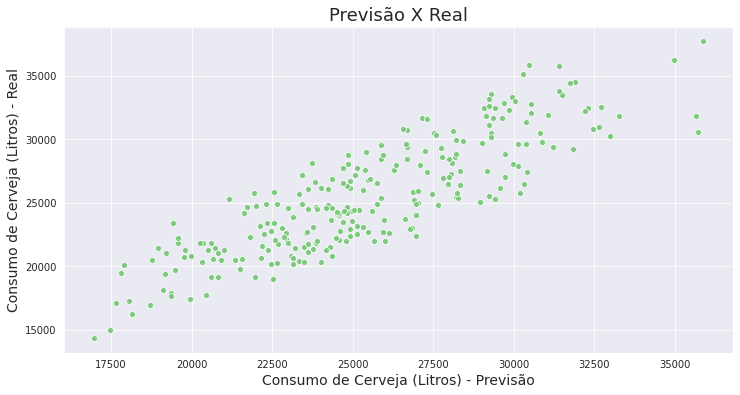

In [ ]:
# Gerando gráfico com Seaborn
ax = sns.scatterplot(x=y_predict_train, y=y_train)

# Configurações
ax.figure.set_size_inches(12,6)
ax.set_title("Previsão X Real", fontsize=18)
ax.set_xlabel("Consumo de Cerveja (Litros) - Previsão", fontsize=14)
ax.set_ylabel("Consumo de Cerveja (Litros) - Real", fontsize=14)
ax;

Obtendo os resíduos ($u_i$)
> $Y_i$ - ( B_1 + B_2X_{2i} + B_3X_{3i} + B_4X_{4i} ) = $u_i$

In [ ]:
# Obtendo os residuos
residuo = y_train - y_predict_train

Gráfico de dispersão entre valor estimado e resíduos

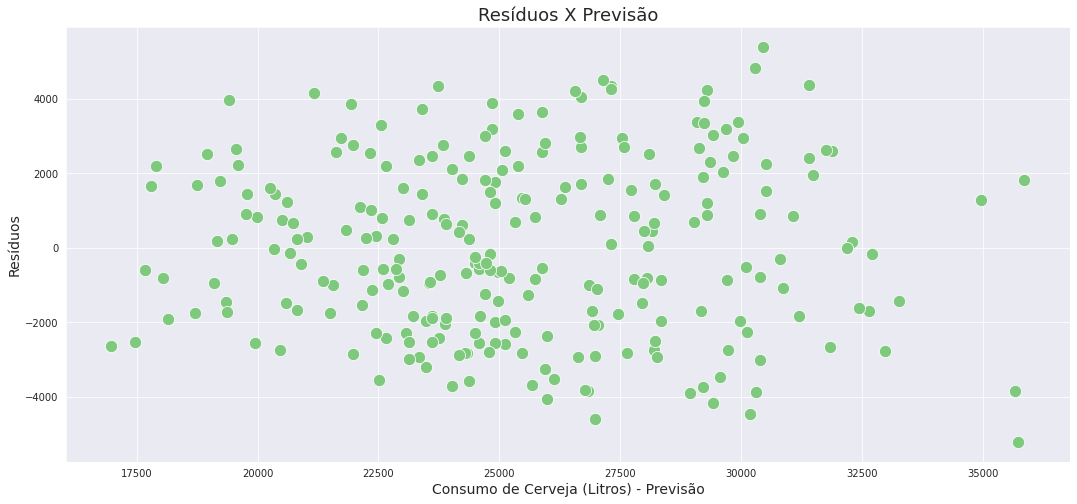

In [ ]:
# você pode usar o atributo 's' para definir o tamanho das bolinhas geradas no gráfico
ax = sns.scatterplot(x=y_predict_train, y=residuo, s=150)

# Configurações
ax.figure.set_size_inches(18, 8)
ax.set_title("Resíduos X Previsão", fontsize=18)
ax.set_xlabel("Consumo de Cerveja (Litros) - Previsão", fontsize=14)
ax.set_ylabel("Resíduos", fontsize=14)
ax;

Plotando a distribuição de frequências dos resíduos

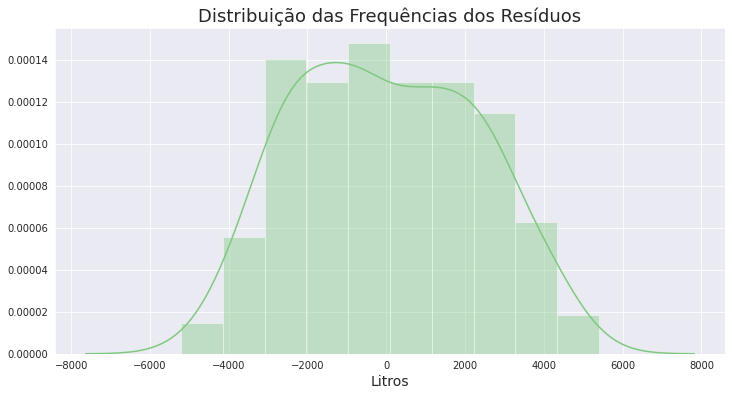

In [ ]:
ax = sns.distplot(residuo)

# Configurações
ax.figure.set_size_inches(12, 6)
ax.set_title("Distribuição das Frequências dos Resíduos", fontsize=18)
ax.set_xlabel("Litros", fontsize=14)
ax;

## Comparando Modelos

### Gerando novo modelo

Estimando um novo modelo com a substituição da variável explicativa Temperatura Máxima pela Temperatura Média

Vamos criar novos _datasets_ de Treino e Teste, instanciar um novo modelo, treiná-lo, gerar previsões e comparar elas com as previsões do modelo anterior

In [ ]:
X2 = dados[["temp_media", "chuva", "fds"]]

In [ ]:
# Criando novos Datasets de Treino e Teste
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=2811)

In [ ]:
# Instanciando a classe LinearRegression()
modelo_2 = LinearRegression()

In [ ]:
# Treinar um novo modelo
modelo_2.fit(X2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Vamos obter o **coeficiente de determinação (R²)** do novo modelo estimado e comparar com o resultado do modelo anterior

In [ ]:
print( "Modelo com Temperatura Média" )
print( f"R² = {modelo_2.score(X2_train, y2_train).round(2)}" )

Modelo com Temperatura Média
R² = 0.66


In [ ]:
print( "Modelo com Temperatura Máxima" )
print( f"R² = {modelo.score(X_train, y_train).round(2)}" )

Modelo com Temperatura Máxima
R² = 0.73


Gerando previsões para os dados de TESTE (`X_test` e `X2_test`) utilizando o método `predict()` dos objetos `modelo` e `modelo_2`

In [ ]:
y_predict = modelo.predict(X_test)
y_predict_2 = modelo_2.predict(X2_test)

Vamos obter o **coeficiente de determinação (R²)** para as previsões dos dois modelos

In [ ]:
print( "Modelo com Temperatura Média" )
print( f"R² = {metrics.r2_score(y2_test, y_predict_2).round(2)}" )

Modelo com Temperatura Média
R² = 0.66


In [ ]:
print( "Modelo com Temperatura Máxima" )
print( f"R² = {metrics.r2_score(y_test, y_predict).round(2)}" )

Modelo com Temperatura Máxima
R² = 0.69


### Outras Métricas de Regressão

O **Scikit-Learn** disponibiliza as principais métricas de regressão para modelo lineares:

> **Erro Quadrático Médio** &rarr; Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

> **Raiz do Erro Quadrático Médio** &rarr; Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

Vamos obter as métricas desses modelos.

In [ ]:
# obtendo métrica para o modelo com Temperatura Média
EQM_2 = metrics.mean_squared_error(y2_test, y_predict_2).round(2)
REQM_2 = np.sqrt(metrics.mean_squared_error(y2_test, y_predict_2)).round(2)
R2_2 = metrics.r2_score(y2_test, y_predict_2).round(2)

# Criar um DataFrame com os valores para ficar melhor de visualizar
pd.DataFrame([EQM_2, REQM_2, R2_2], ["EQM", "REQM", "R²"], columns=["Métricas"])

,Métricas
EQM,6060775.46
REQM,2461.86
R²,0.66


In [ ]:
# obtendo métrica para o modelo com Temperatura Média
EQM = metrics.mean_squared_error(y_test, y_predict).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_predict)).round(2)
R2 = metrics.r2_score(y_test, y_predict).round(2)

# Criar um DataFrame com os valores para ficar melhor de visualizar
pd.DataFrame([EQM, REQM, R2], ["EQM", "REQM", "R²"], columns=["Métricas"])

,Métricas
EQM,5471976.38
REQM,2339.23
R²,0.69


## Salvando e Carregando o Modelo Estimado

### Salvando o Modelo Estimado

O módulo `pickle` implementa protocolos binários para serializar e desserializar a estrutura de um objeto Python.

É ele que usamos para salvar nossos modelos de Machine Learning.

In [ ]:
import pickle

In [ ]:
# Cria um arquivo e abra com o método 'open()' em modo WriteBinary 'wb'
output = open('modelo_consumo_cerveja', 'wb')

# salva o nosso 'modelo' no arquivo aberto em 'output'
pickle.dump(modelo, output)

# fecha o arquivo
output.close()

### Abrindo o Modelo Estimado

Supondo que fosse abrir o arquivo em outro notebook

In [ ]:
import pickle

# Abra o arquivo em modo ReadBinary 'rb'
arquivo = open("modelo_consumo_cerveja", 'rb')

# Carregue o modelo em uma variável
novo_modelo = pickle.load(arquivo)

# Fecha o arquivo
arquivo.close()

In [ ]:
# Faça teste para ver se está funcionando
temp_max = 30.5
chuva = 12.2
fds = 0
entrada = [[temp_max, chuva, fds]]
print( f"{novo_modelo.predict(entrada)[0].round(2)} Litros" )

26094.9 Litros
